In [ ]:
# LogisticRegression ( Accuracy: 0.8674 Precision of: 0.7638 )

# RandomForestClassifier ( Accuracy: 0.9294 Precision of: 0.9577 )

# SVC ( Accuracy: 0.9079  Precision of: 0.9149 )

# KNeighborsClassifier ( Accuracy: 0.8907 Precision of: 0.8489 )

# GradientBoostingClassifier ( Accuracy: 0.9218 Precision of: 0.9267 )

# XGBClassifier ( Accuracy: 0.9308 Precision of: 0.9377)

# VotingClassifier

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the historical file with loans
data = pd.read_csv('loan.csv')

# Print the columns in the new data set
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
# 1. Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


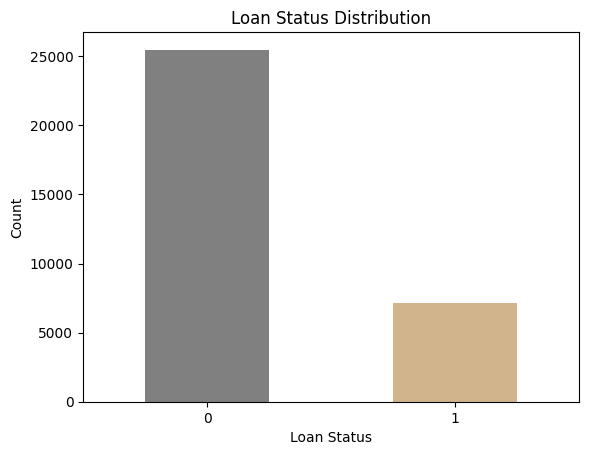

In [4]:
data["loan_status"].value_counts().plot(kind='bar', color=['grey', 'tan'])
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [5]:
# Create the cross table for loan status, home ownership, and the max employment length
pd.crosstab(data["loan_status"],data["person_home_ownership"], values=data["person_emp_length"], aggfunc="max")

person_home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,123.0,24.0,31.0,41.0
1,34.0,11.0,17.0,123.0


In [6]:
# Create an array of indices where employment length is greater than 60
indices = data[data["person_emp_length"] > 60].index

# Drop the records from the data based on the indices and create a new dataframe
data = data.drop(indices)

# Create the cross table from earlier and include minimum employment length
pd.crosstab(data["loan_status"],data["person_home_ownership"], values=data['person_emp_length'], aggfunc=['min','max'])

min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0

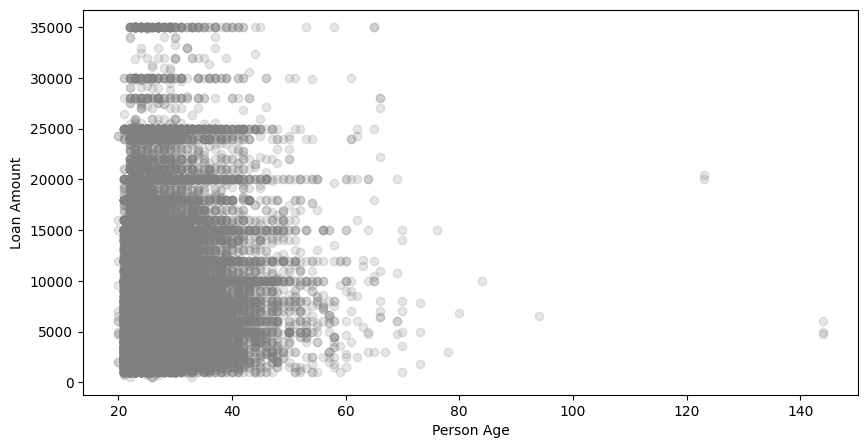

In [7]:
# Create the scatter plot for age and amount
plt.figure(figsize=(10, 5))
plt.scatter(data["person_age"], data["loan_amnt"], c='grey', alpha=0.2)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

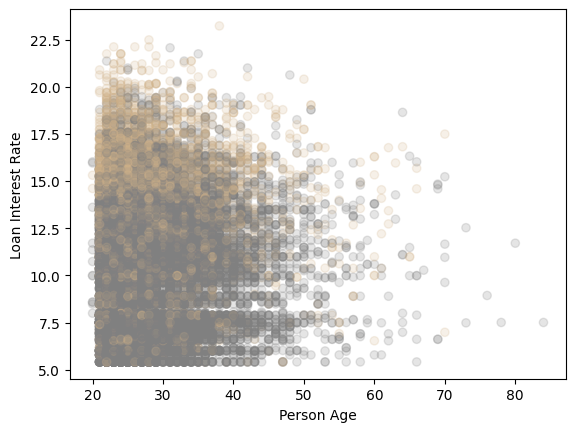

In [8]:
# Use Pandas to drop the record from the data frame and create a new one
import matplotlib.colors as mcolors  # Importa a biblioteca de cores
data = data.drop(data[data["person_age"] > 100].index)

# Create a scatter plot of age and interest rate
colors = ["grey","tan"]
plt.scatter(data["person_age"], data["loan_int_rate"], c = data['loan_status'],  cmap = mcolors.ListedColormap(colors), alpha=0.2)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

In [9]:
# Replace the null values with the median value for all employment lengths
data['person_emp_length'] = data['person_emp_length'].fillna(data['person_emp_length'].median())

# Store the array on indices
indices = data[data['loan_int_rate'].isnull()].index

# Save the new data without missing data
data = data.drop(indices)

In [10]:
# Create two data sets for numeric and non-numeric data
data_num = data.select_dtypes(exclude=['object'])
data_str = data.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
data_str_onehot = pd.get_dummies(data_str)

# Union the one-hot encoded columns to the numeric ones
data = pd.concat([data_num, data_str_onehot], axis=1)

# Print the columns in the new data set
data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,False,False,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,1,0.57,3,True,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,False,False,False,True,False,False,False,False,False,True
5,21,9900,2.0,2500,7.14,1,0.25,2,False,False,...,True,True,False,False,False,False,False,False,True,False


In [ ]:
# 2. Modelling

In [11]:
# Import models from Library
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay, auc, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import KFold
import xgboost as xgb # the best performance

In [12]:
# Create Train and Test sets
# Create X and y Sets
X = data.drop('loan_status', axis=1)
y = data[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

In [13]:
# Print the columns in the new data set
X_train.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
24407,30,72000,3.0,9000,14.22,0.13,6,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2528,23,21000,2.0,3000,12.68,0.14,2,False,False,False,...,False,False,False,True,False,False,False,False,False,True
15961,22,4800,0.0,1200,14.26,0.25,2,False,False,False,...,False,False,False,True,False,False,False,False,False,True
6966,26,92000,0.0,6000,15.58,0.07,3,False,False,False,...,True,False,False,False,True,False,False,False,True,False
13832,21,96000,1.0,7000,12.53,0.07,4,False,False,True,...,False,False,True,False,False,False,False,False,True,False


In [14]:
# Print the columns in the new data set
X_test.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
31622,49,45000,2.0,15000,13.49,0.33,12,False,False,False,...,False,False,False,True,False,False,False,False,True,False
24935,34,60500,3.0,11200,15.62,0.19,10,False,False,False,...,False,False,False,False,True,False,False,False,False,True
15342,21,62004,0.0,15000,7.29,0.24,4,False,False,False,...,True,True,False,False,False,False,False,False,True,False
3460,25,68000,9.0,10800,10.74,0.16,2,False,False,False,...,True,False,True,False,False,False,False,False,True,False
16424,23,58800,7.0,3000,10.36,0.05,3,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [15]:
# Scale the model with StandardScaler to reduce computational process
# Scaler for training and test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
X_train_slr = scaler.fit_transform(X_train) # Creating a X_train variable scaled, in order to don't lose the original X_train for future calculations
X_test_slr = scaler.transform(X_test)

In [17]:
# Create the main classifiers
log_clf = LogisticRegression(solver='lbfgs', max_iter=1000)
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
knn_clf = KNeighborsClassifier()
grd_clf = GradientBoostingClassifier()
xgb_clf = xgb.XGBClassifier()

voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('rf', rnd_clf),
        ('xgb', xgb_clf)
    ],
    voting='soft'
)

In [18]:
# Training and validation
# Training the models and printing their Accuracy and Precision in order to make a "first level" evaluation
# the best models have the highest Accuracy and Precision: RandomForestClassifier, GradientBoostingClassifier, XGBClassifier, and VotingClassifier.
import numpy as np
# --- First General Avaliation of the Models ---
# Loop to fit, predict and evaluate all different models:

for clf in (log_clf, rnd_clf, svm_clf, knn_clf, grd_clf, xgb_clf, voting_clf):
    clf.fit(X_train_slr, np.ravel(y_train))
    y_pred = clf.predict(X_test_slr)
    print(f"The {clf.__class__.__name__} has an Accuracy: {accuracy_score(y_test, y_pred):.4f} , and a Precision of: {precision_score(y_test, y_pred):.4f} ")

The LogisticRegression has an Accuracy: 0.8674 , and a Precision of: 0.7638 
The RandomForestClassifier has an Accuracy: 0.9296 , and a Precision of: 0.9602 
The SVC has an Accuracy: 0.9079 , and a Precision of: 0.9149 
The KNeighborsClassifier has an Accuracy: 0.8907 , and a Precision of: 0.8489 
The GradientBoostingClassifier has an Accuracy: 0.9218 , and a Precision of: 0.9267 
The XGBClassifier has an Accuracy: 0.9308 , and a Precision of: 0.9377 
The VotingClassifier has an Accuracy: 0.9295 , and a Precision of: 0.9484 


Validation of the LogisticRegression model: 
loan_status
0    9845
1    1939
Name: count, dtype: int64
The Report from LogisticRegression:
              precision    recall  f1-score   support

 Non-Default       0.89      0.95      0.92      9198
     Default       0.76      0.57      0.65      2586

    accuracy                           0.87     11784
   macro avg       0.83      0.76      0.79     11784
weighted avg       0.86      0.87      0.86     11784

The LogisticRegression has an Accuracy: 0.8674, and a Precision of: 0.7638


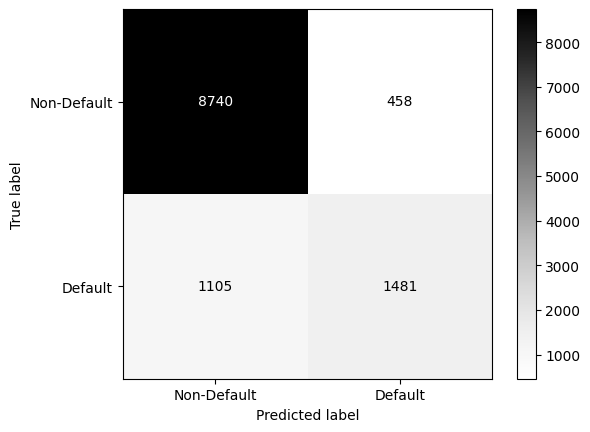

Validation of the RandomForestClassifier model: 
loan_status
0    9887
1    1897
Name: count, dtype: int64
The Report from RandomForestClassifier:
              precision    recall  f1-score   support

 Non-Default       0.92      0.99      0.96      9198
     Default       0.96      0.71      0.82      2586

    accuracy                           0.93     11784
   macro avg       0.94      0.85      0.89     11784
weighted avg       0.93      0.93      0.93     11784

The RandomForestClassifier has an Accuracy: 0.9300, and a Precision of: 0.9642


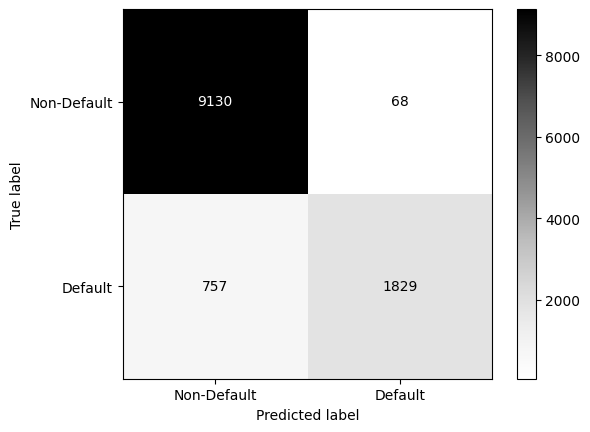

Validation of the XGBClassifier model: 
loan_status
0    9762
1    2022
Name: count, dtype: int64
The Report from XGBClassifier:
              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9198
     Default       0.94      0.73      0.82      2586

    accuracy                           0.93     11784
   macro avg       0.93      0.86      0.89     11784
weighted avg       0.93      0.93      0.93     11784

The XGBClassifier has an Accuracy: 0.9308, and a Precision of: 0.9377


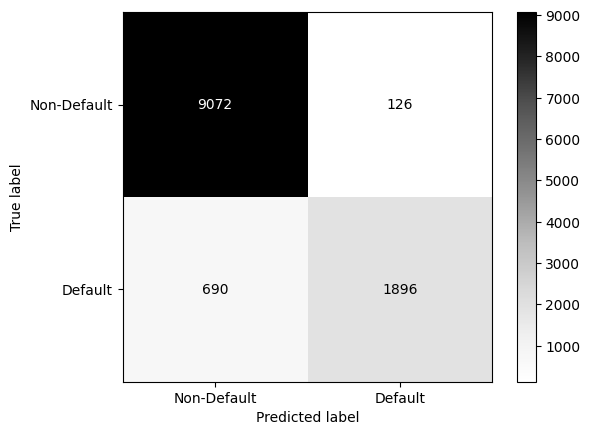

Validation of the VotingClassifier model: 
loan_status
0    9820
1    1964
Name: count, dtype: int64
The Report from VotingClassifier:
              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9198
     Default       0.95      0.72      0.82      2586

    accuracy                           0.93     11784
   macro avg       0.94      0.85      0.89     11784
weighted avg       0.93      0.93      0.93     11784

The VotingClassifier has an Accuracy: 0.9297, and a Precision of: 0.9476


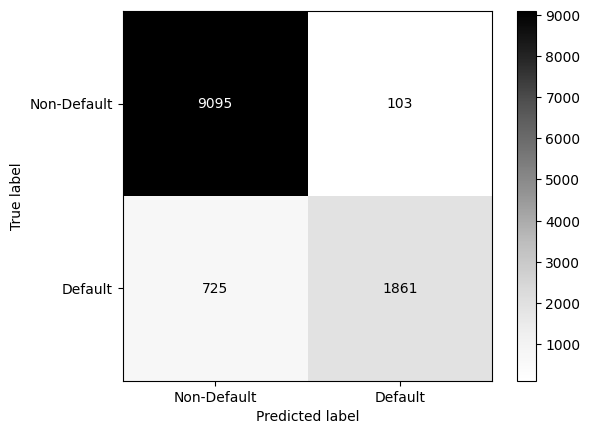

In [19]:
# Import necessary libraries (assuming they were imported earlier in your script)
colors = ['yellow', 'silver', 'black', 'grey', 'tan', 'brown']  # Define a list of colors for potential plotting purposes

# Initialize lists to store evaluation metrics for different models
model_name_list = []       # List to store model names for each classifier
fallout_list = []          # List to store False Positive Rate (FPR) for ROC curves
sensitivity_list = []      # List to store True Positive Rate (TPR) for ROC curves
thresholds_list = []       # List to store threshold values from ROC calculation
roc_auc_list = []          # List to store AUC values for each model
preds_df_all = pd.DataFrame()  # DataFrame to consolidate probabilities and predictions for all models

# Loop through the classifiers to fit, predict, and evaluate them
for idx, clf in enumerate((log_clf, rnd_clf, xgb_clf, voting_clf)):  # Iterate through classifiers

    # Store and print the model name
    model_name_list.append(clf.__class__.__name__)  # Append the class name of the current classifier to the model list
    print(f"Validation of the {model_name_list[idx]} model: ")  # Display the current model being validated

    # Fit the current classifier on the training data
    clf.fit(X_train_slr, np.ravel(y_train))  # Train the model with X_train_slr (features) and y_train (target)

    # Predict probabilities for the test data
    preds = clf.predict_proba(X_test_slr)  # Predict class probabilities; `predict_proba` returns probabilities for each class

    # Create a DataFrame to store the probabilities of the positive class (e.g., default)
    preds_df = pd.DataFrame(preds[:, 1], columns=['prob_default'])  # Extract probabilities for the positive class

    # Store the probabilities in a consolidated DataFrame
    preds_df_all[f"prob_default {model_name_list[idx]}"] = preds_df['prob_default']  # Add current model's probabilities to `preds_df_all`

    # --- Assign loan status based on a threshold ---

    # Define a decision threshold
    threshold = 0.5  # Default threshold of 0.5 to classify positive vs negative

    # Assign loan status (predicted class) based on the threshold
    preds_df["loan_status"] = preds_df["prob_default"].apply(lambda x: 1 if x > threshold else 0)  # Binary classification

    # Store predicted loan status in the consolidated DataFrame
    preds_df_all[f"loan_status {model_name_list[idx]}"] = preds_df['loan_status']

    # Print the count of each loan status (0 = non-default, 1 = default)
    print(preds_df["loan_status"].value_counts())  # Display class distribution for predicted values

    # --- Classification Report ---

    # Generate and print the classification report
    print(f"The Report from {model_name_list[idx]}:")
    target_names = ['Non-Default', 'Default']  # Define class names for the report
    print(classification_report(y_test, preds_df["loan_status"], target_names=target_names))  # Evaluation metrics

    # Print accuracy and precision metrics
    print(f"The {model_name_list[idx]} has an Accuracy: {accuracy_score(y_test, preds_df['loan_status']):.4f}, "
          f"and a Precision of: {precision_score(y_test, preds_df['loan_status']):.4f}")

    # --- Confusion Matrix ---

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, preds_df['loan_status'])  # Confusion matrix: actual vs predicted values

    class_names = ['Non-Default', 'Default']

    # Plot and display the confusion matrix
    display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)  # Configure the display
    display_cm.plot(cmap=plt.cm.Greys)  # Plot the confusion matrix
    plt.show()  # Show the plot

    # --- ROC Curve and AUC ---

    # Evaluate the model using ROC-AUC
    prob_default = preds[:, 1]  # Extract probabilities of the positive class

    # Calculate ROC curve metrics: FPR (fallout), TPR (sensitivity), and thresholds
    fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)  # Compute ROC metrics

    # Calculate the Area Under the Curve (AUC) for ROC
    roc_auc = roc_auc_score(y_test, prob_default)  # AUC score for the current model

    # Append the ROC metrics to the respective lists
    fallout_list.append(fallout)  # Store FPR values
    sensitivity_list.append(sensitivity)  # Store TPR values
    thresholds_list.append(thresholds)  # Store thresholds
    roc_auc_list.append(roc_auc)  # Store AUC scoreDiving Dipe into the Analysis:

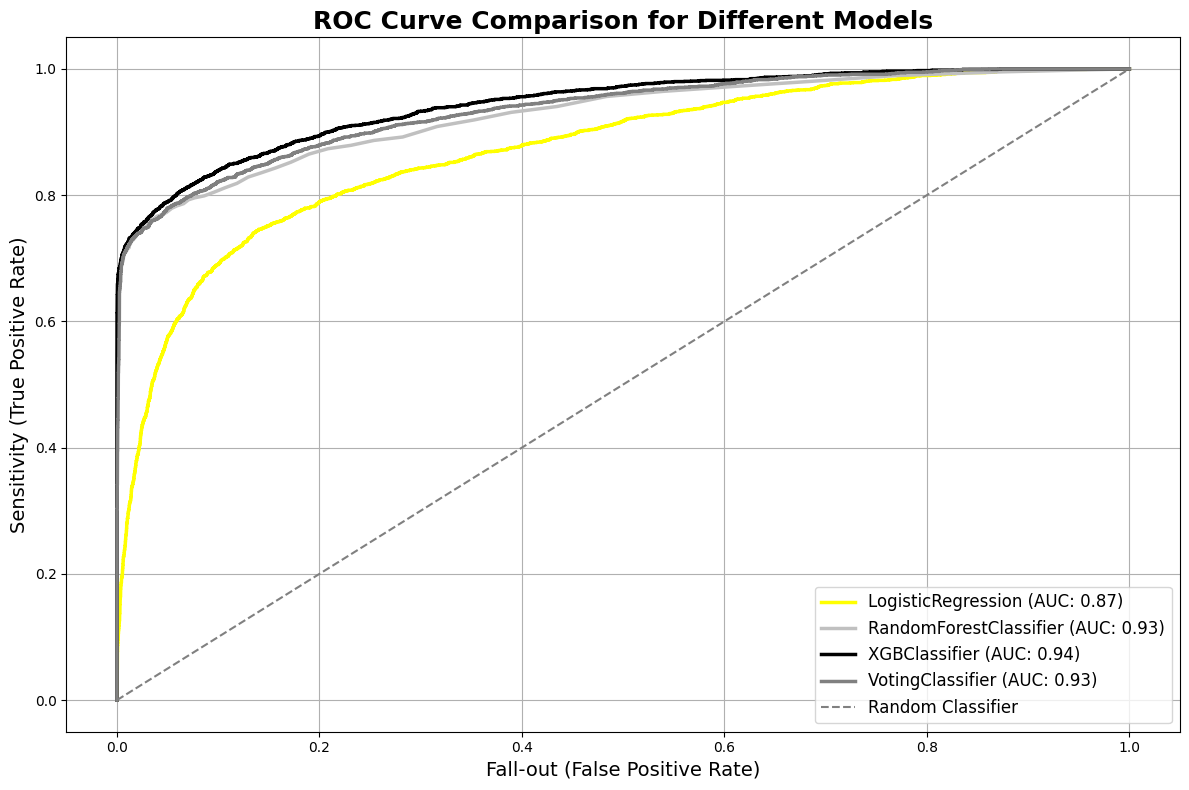

In [20]:
import matplotlib.pyplot as plt

# --- Plot the ROC Curve for all models with improvements:

# Set the figure size for better clarity
plt.figure(figsize=(12, 8))

# Plot each model's ROC curve
for idx in range(len(model_name_list)):
    # Plot each ROC curve with a unique color, and add AUC to the label
    plt.plot(fallout_list[idx], sensitivity_list[idx],
             color=colors[idx], linewidth=2.5, label=f"{model_name_list[idx]} (AUC: {roc_auc_list[idx]:.2f})")

# Plot the diagonal line (random model)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier', linewidth=1.5)

# Add title and labels with larger fonts for better visibility
plt.title("ROC Curve Comparison for Different Models", fontsize=18, fontweight='bold')
plt.xlabel('Fall-out (False Positive Rate)', fontsize=14)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=14)

# Add grid lines for easier interpretation of the graph
plt.grid(True)

# Add a legend with a cleaner font size and position it better
plt.legend(loc='lower right', fontsize=12)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

<Axes: >

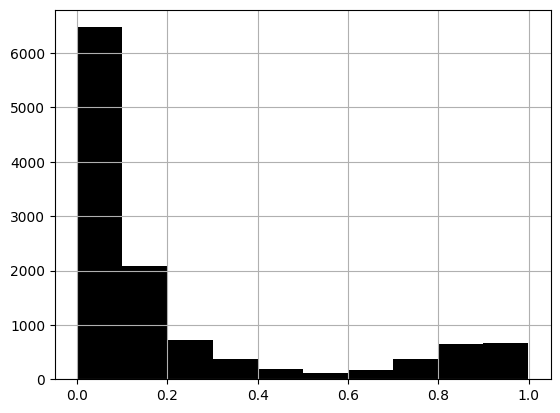

In [21]:
preds_df["prob_default"].hist(color = "black")

In [22]:
# Calculate the threshold for a 85% acceptance rate
threshold_85 = np.quantile(preds_df["prob_default"], 0.85)
print(threshold_85)

# Apply acceptance rate threshold
preds_df["pred_loan_status"] = preds_df["prob_default"].apply(lambda x: 1 if x > threshold_85 else 0)

# Print the counts of loan status after the threshold
print(preds_df["pred_loan_status"].value_counts())

0.6515008638751131
pred_loan_status
0    10016
1     1768
Name: count, dtype: int64


In [23]:
# Set all the acceptance rates to test
accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

In [24]:
test_pred = pd.DataFrame()
test_pred["prob_default"] = preds_df["prob_default"]

# Create lists to store thresholds and bad rates
thresholds = []
bad_rates = []
num_accepted_loans = []
avg_loan_amnt = []
estimated_value = []

# Populate the arrays for the strategy table with a for loop
for idx, rate in enumerate(accept_rates):

    # Calculate the threshold for the acceptance rate
    thresh = np.quantile(test_pred["prob_default"], rate).round(3)

    # Add the threshold value to the list of thresholds
    thresholds.append(np.quantile(test_pred['prob_default'], rate).round(3))

    # Reassign the loan_status value using the threshold
    preds_df['pred_loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > thresh else 0)

    # Create a set of accepted loans using this acceptance rate
    accepted_loans = preds_df[preds_df["pred_loan_status"] == 0]

    # Calculate and append the bad rate using the acceptance rate
    bad_rate = np.sum((accepted_loans["loan_status"]) / len(accepted_loans["loan_status"])).round(3)
    bad_rates.append(bad_rate)

    num_accepted_loans.append(len(accepted_loans))

    avg_loan_amnt.append(np.mean(X_test["loan_amnt"]))

    #estimated_value.append( ((len(accepted_loans) * (1 - bad_rate)) * X_test["loan_amnt"]) - ( len(accepted_loans) * bad_rate * np.mean(X_test["loan_amnt"]) ) )

    estimated_val = ((len(accepted_loans) * (1 - bad_rate)) * np.mean(X_test["loan_amnt"])) - ( len(accepted_loans) * bad_rate * np.mean(X_test["loan_amnt"]) )

    estimated_value.append(estimated_val)

pd.options.display.float_format = '{:.5f}'.format

# Create a data frame of the strategy table
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates, num_accepted_loans, avg_loan_amnt, estimated_value), columns = ['Acceptance Rate','Threshold','Bad Rate', 'Num Accepted Loans', 'Avg Loan Amnt', 'Estimated Value'])
strat_df

,Acceptance Rate,Threshold,Bad Rate,Num Accepted Loans,Avg Loan Amnt,Estimated Value
0,1.00000,0.99900,0.16600,11781,9556.28394,75205164.20698
1,0.95000,0.91200,0.12300,11199,9556.28394,80693701.21499
2,0.90000,0.82500,0.07400,10605,9556.28394,86345421.32765
3,0.85000,0.65200,0.02000,10017,9556.28394,91896284.41955
4,0.80000,0.33800,0.00000,9425,9556.28394,90067976.17532
5,0.75000,0.23000,0.00000,8841,9556.28394,84487106.35183
6,0.70000,0.17700,0.00000,8245,9556.28394,78791561.12101
7,0.65000,0.14500,0.00000,7667,9556.28394,73268029.00119
8,0.60000,0.11900,0.00000,7071,9556.28394,67572483.77037
9,0.55000,0.10000,0.00000,6468,9556.28394,61810044.55193


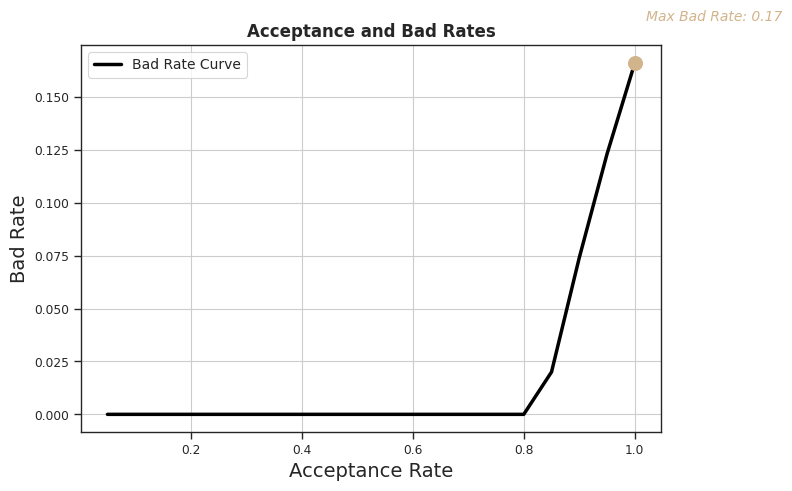

In [28]:
# higher is our acceptance rate, higher is our Bad Rate
# If we want to sell more Loans, we have for sure the higher bad rate as well
import seaborn as sns
# Set Seaborn style for a more attractive and clean plot
sns.set(style="ticks", context="paper")

# Find the index of the maximum Bad Rate
max_bad_rate_index = strat_df['Bad Rate'].idxmax()

# Get the maximum Bad Rate and corresponding Acceptance Rate
max_bad_rate = strat_df['Bad Rate'][max_bad_rate_index]
max_acceptance_rate = strat_df['Acceptance Rate'][max_bad_rate_index]

# Create the plot using Seaborn's lineplot function for better aesthetics
plt.figure(figsize=(8, 5))
sns.lineplot(x=strat_df['Acceptance Rate'], y=strat_df['Bad Rate'], linewidth=2.5, label="Bad Rate Curve", color='black')

# Add the maximum bad rate point to the plot
plt.scatter(max_acceptance_rate, max_bad_rate, color='tan', s=100, zorder=5)  # Red point for max bad rate
plt.text(max_acceptance_rate + 0.02, max_bad_rate + 0.02, f'Max Bad Rate: {max_bad_rate:.2f}',  color='tan', fontsize=10,  style='italic')

# Add labels for the axes
plt.xlabel('Acceptance Rate', fontsize=14)
plt.ylabel('Bad Rate', fontsize=14)

# Set the title of the plot
plt.title('Acceptance and Bad Rates', fontsize=12, weight='bold')

# Add a grid for better readability
plt.grid(True)

# Display the legend with a better placement and fontsize
plt.legend(loc='best', fontsize=10)

# Show the plot
plt.tight_layout()  # Adjust layout to avoid any overlap
plt.show()

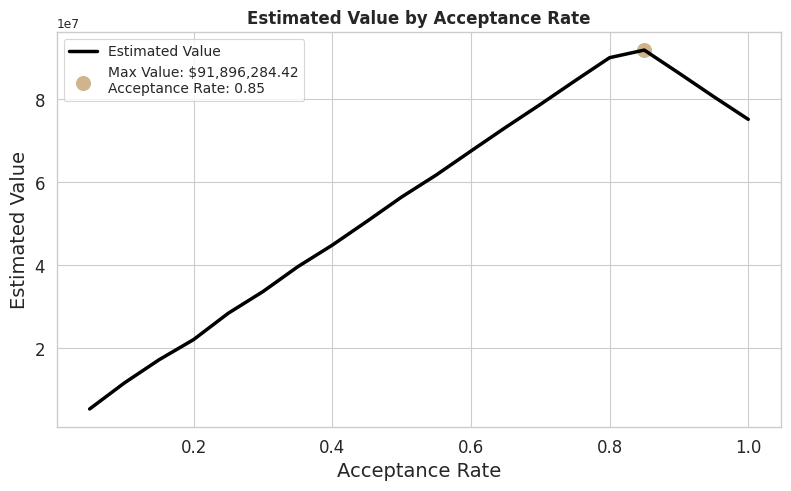

In [30]:
# Set the Seaborn style for a cleaner and modern look
sns.set(style="whitegrid", context="paper")

# Find the index of the maximum value in 'Estimated Value'
max_index = strat_df['Estimated Value'].idxmax()

# Get the maximum value and the corresponding 'Acceptance Rate'
max_value = strat_df['Estimated Value'][max_index]
max_acceptance_rate = strat_df['Acceptance Rate'][max_index]

# Create the plot with a clean and styled appearance
plt.figure(figsize=(8, 5))
sns.lineplot(x=strat_df['Acceptance Rate'], y=strat_df['Estimated Value'], linewidth=2.5, label="Estimated Value", color='black')

# Format the max value to display with a dollar sign
max_value_formatted = f"${max_value:,.2f}"

# Add the maximum point to the plot and label it with the dollar sign format
plt.scatter(max_acceptance_rate, max_value, color='tan', s=100, label=f'Max Value: {max_value_formatted}\nAcceptance Rate: {max_acceptance_rate:.2f}')

# Set plot titles and labels
plt.title('Estimated Value by Acceptance Rate', fontsize=12, weight='bold')
plt.xlabel('Acceptance Rate', fontsize=14)
plt.ylabel('Estimated Value', fontsize=14)

# Customize the legend and tick sizes
plt.legend(loc='best', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

In [37]:
test_pred_df = pd.concat([preds_df, pd.DataFrame(X_test["loan_amnt"]).reset_index(drop = True)], axis = 1)

# Calculate the bank's expected loss and assign it to a new column
test_pred_df["expected_loss"] = test_pred_df["prob_default"] * test_pred_df["loan_amnt"] * test_pred_df["pred_loan_status"] # LGD
test_pred_df

,prob_default,loan_status,pred_loan_status,loan_amnt,expected_loss
0,0.87076,1,1,15000,13061.34440
1,0.91467,1,1,11200,10244.30113
2,0.02871,0,1,15000,430.67029
3,0.01962,0,1,10800,211.92861
4,0.04891,0,1,3000,146.72489
...,...,...,...,...,...
11779,0.00381,0,0,8000,0.00000
11780,0.06172,0,1,6600,407.34253
11781,0.25020,0,1,16000,4003.25034
11782,0.22406,0,1,6000,1344.33435


In [38]:
# Calculate the total expected loss to two decimal places
tot_exp_loss = round(np.sum(test_pred_df['expected_loss']), 2)

# Print the total expected loss
print('Total expected loss: ', '${:,.2f}'.format(tot_exp_loss))

Total expected loss:  $27,589,718.01


In [ ]:
# https://medium.com/@danrlei.diegues_91903/credit-risk-modeling-in-python-e9b2379ebeb0